In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import datetime
import webbrowser
from scipy import stats
import numpy as np

In [12]:
#Baseline assumptions

arr = 6/100
#arr = annual rate of return
time = 40
start_value = 10000
annual_contrib = 1000

In [13]:
#Formula for an investment

def future_value(rate,time,start_value):
    return start_value * (1 + rate)**time

In [14]:
future_value(arr,2,start_value)

11236.000000000002

In [15]:
#math check
((10000 * 1.06) * 1.06)

11236.0

## Power of Compounding / Time
### > Twice the Return and Triple the Starting Value

In [16]:
#Baseline: 40 years, 6% arr, $10,000 start value

baseline = future_value(arr,time,start_value)

In [17]:
#Half the time

half_time = future_value(arr,time/2,start_value)

In [76]:
#Twice the time = 3.2x the return

print('Baseline 40 years return premium over investment over 20 years = ',baseline / half_time)

Baseline 40 years return premium over investment over 20 years =  3.207135472212848


In [70]:
def returns_array(rate,time,start_val):
    return_list = []
    for i in range(1,time+1):
        return_list.append(future_value(rate,i,start_val))
    return return_list

In [71]:
x40 = [i for i in range(1,time+1)]
x20 = [i for i in range(1,20+1)]

C:\Users\michael.amenta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


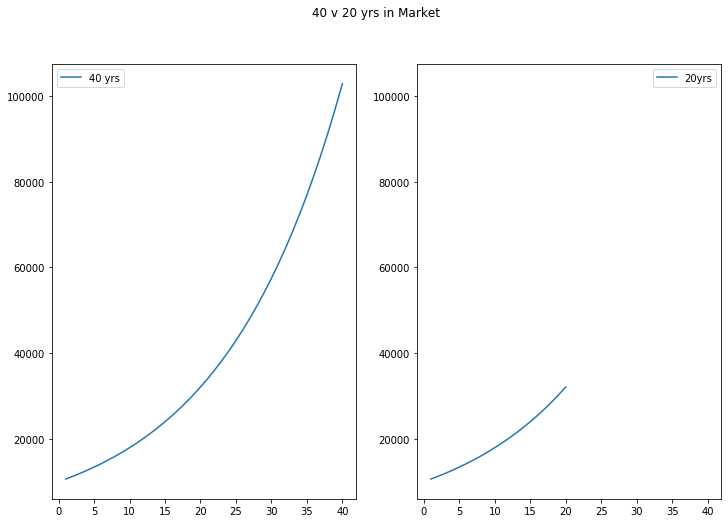

In [72]:
#chart financial return over 40 years
y40 = returns_array(arr,time,start_value)
y20 = returns_array(arr,20,start_value)

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(121)
ax.plot(x40,y40,label='40 yrs')
ax.legend(loc='best')

ax2 = plt.subplot(122, sharey = ax, sharex = ax)
ax2.plot(x20,y20,label='20yrs')
ax2.legend(loc='best')

plt.suptitle('40 v 20 yrs in Market')
fig.show()

### Triple start value --> still not enough

In [74]:
half_time_triple_start = future_value(arr,time/2,start_value * 3)

print('Baseline return premium over 3x value in half the time = ',baseline / half_time_triple_start)

Baseline return premium over 3x value in half the time =  1.0690451574042827


### Double the return over half the time --> still not enough

In [20]:
high_rate = future_value(arr * 2,time / 2,start_value)

In [75]:
#still not enough

baseline / high_rate
print('Baseline return premium over double the rate of return in half the time = ',baseline / high_rate)

Baseline return premium over double the rate of return in half the time =  1.0662871050742548


## Power of Low Fee Funds

In [77]:
def net_perf(rate,fee,time,start_value):
    return start_value * (1 + ((rate-fee)/100))**time

In [91]:
high_fee = 1

hf_perf = net_perf(6,high_fee,40,10000)
hf_perf

70399.88712124657

In [90]:
low_fee = 0.2

lf_perf = net_perf(6,low_fee,40,10000)
lf_perf

95373.27762256959

In [96]:
low_fee_multiplier = (lf_perf/hf_perf - 1) * 100
print('Additional amount earned over 40 yrs with low fee = ', low_fee_multiplier, '%')

Additional amount earned over 40 yrs with low fee =  35.473622931117 %


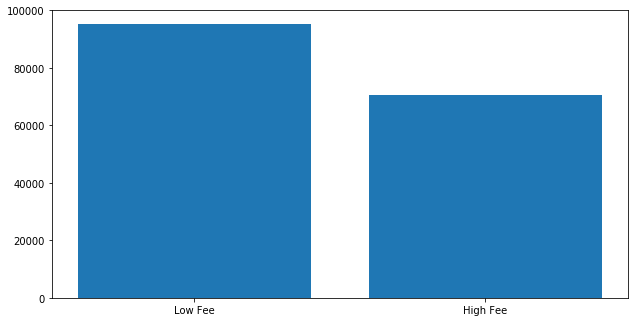

In [105]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
cats = ['Low Fee', 'High Fee']
returns = [lf_perf,hf_perf]
ax.bar(cats,returns)
plt.show()

Mutual Funds sometimes have 12b-1 fees, which must be added to the expense ratio, and loads which is a percent of your purchase (for front load) or final sale (back load) that the fund keeps. You should account for these in a purchase decision.

ETFs don't have these fees, but they do charge a ~$10 transaction fee per purchase.

### Hidden Costs: Turnover + Taxes (Equity Funds)

Turnover estimated as (1) Double the fund's reported turnover, (2) multiply that figure by estimated transaction costs of 0.6%, and (3) calculate the resultant number as a percentage of the fund's average assets. Or 1% for every 100% in turnover.

https://www.bogleheads.org/forum/viewtopic.php?t=188023

Tax inefficiency of active fund (high turnover) estimated to be 75bps versus 30 bps for index fund

http://johncbogle.com/wordpress/wp-content/uploads/2010/04/FAJ-All-In-Investment-Expenses-Jan-Feb-2014.pdf

Add tax inefficiency and turnover estimate to management fee before making a final decision.

### Will a fund perform well enough to compensate for the difference in management fee? 
It's impossible to know, and best to categorize a decision like this as a "bet".

In [107]:
webbrowser.open('https://www.morningstar.com/blog/2019/02/12/active-passive-funds.html')

True

## Roth vs Non-Roth
### Only thing that matters is whether income tax rate is higher on contribution versus on withdrawal (when you're 60+)

In [51]:
#Assume 100k salary with 30% tax rate and 10% after-tax savings rate

def annuity(contribution, rate, time,cap_gains_tax):
    return (contribution * (((1 + rate/100) ** time - 1) / rate)) * (1-cap_gains_tax)

In [57]:
roth_contribution = 100000 * 0.8 * 0.1
roth_contribution

8000.0

In [58]:
nonroth_contribution = 100000 * 0.1
nonroth_contribution

10000.0

In [59]:
#Roth

annuity(roth_contribution,6,40,0)

12380.957249501236

In [60]:
#Standard (non-Roth)

annuity(nonroth_contribution,6,40,.2)

12380.957249501236

## Power of Market Timing

In [164]:
#Import 50 years of S&P 500 returns
file = './SP50_hist.csv'
sp50 = pd.read_csv(file)
sp50['Date'] = pd.to_datetime(sp50.Date)


In [170]:
start_date = datetime.date(2018, 12, 15)
one_year_prior = datetime(start_date.year-1, start_date.month, start_date.day)
one_year_prior

datetime.date(2018, 12, 15)

In [163]:
datetime(start_date.year-1, start_date.month, start_date.day)

AttributeError: 'str' object has no attribute 'year'

In [ ]:
sp50.set_index('Date',inplace=True)
sp50.tail()

In [162]:
sp50.loc[sp50.index == datetime(start_date.year-1, start_date.month, start_date.day)]

AttributeError: 'str' object has no attribute 'year'

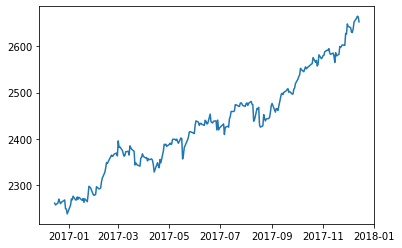

In [151]:
mask = sp50.loc[(sp50.index < '2017-12-15') & (sp50.index >= start_date]['Close']
mask2 = sp50.loc[(sp50.index < start_date) & (sp50.index >= start_date - 1)]['Close']
plt.plot(mask);

In [150]:
print(mask[-1], ' = purchase price')
print(mask2[-1], ' = price one year later')
print('year-over-year growth = ', (mask2[-1]/mask[-1] - 1)*100,'%')
print(stats.percentileofscore(mask2, mask[-1]), ' percentile of all prices in next 12 months')
if stats.percentileofscore(mask2, mask[-1]) < 50:
    print('Good time to buy!')
else:
    print('Not a good time to buy')

2652.01001  = purchase price
2599.949951  = price one year later
year-over-year growth =  -1.963041572380786 %
11.55378486055777  percentile of all prices in next 12 months
Good time to buy!


In [9]:
def get_random_date(year):

    # try to get a date
    try:
        return datetime.datetime.strptime('{} {}'.format(random.randint(1, 366), year), '%j %Y')

    # if the value happens to be in the leap year range, try again
    except ValueError:
        return get_random_date(year)
    
get_random_date(1974)

datetime.datetime(1974, 7, 27, 0, 0)

In [ ]:
#Baseline: show boxplot of returns of purchasing $1000 over 40 years on the same day every year - for each day chosen
##Hypothesis is that distribution should be fairly consistent

In [ ]:
#Compare this boxplot to one over 30 years, 20, 10, 5, 1. Prove that returns are predictable only in the long term.
##Overlay all boxplotson one chart showing annualized return distributions

In [ ]:
#Serve up random 1 year trailing price chart from each of the last 25 years and ask user whether they'd buy or hold on that date
##Display percentile of that day's price relative to price distribution going forward one year  
    ###If buy and above 50th percentile, poor decision
    ###If hold and below price 50th percentile, poor decision
        ####Show user how much additional money they would have made buying on those dates versus Apr 30 each year